In [1]:
# !pip install qiskit-aqua
# !pip install 'qiskit-aqua[cvx]'

In [2]:
from qiskit.circuit.library.data_preparation.pauli_feature_map import PauliFeatureMap
from qiskit import Aer, execute, QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit.aqua.components import multiclass_extensions
from qiskit.aqua.algorithms import QSVM
from qiskit.aqua.utils.dataset_helper import get_feature_dimension
from qiskit.aqua import QuantumInstance, aqua_globals

from qiskit.ml.datasets import digits
import numpy as np

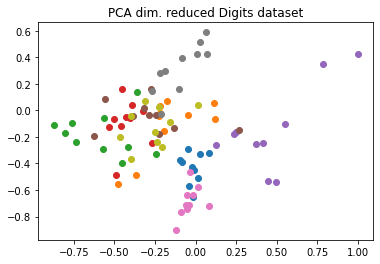

In [3]:
# Load dataset
n = 2  # dimension of each data point
sample_train, training_input, test_input, class_labels = digits(
    training_size=10,
    test_size=5, n=n, plot_data=True
)

datapoints = np.concatenate([test_input[k] for k in test_input])

In [4]:
#applying QSVM on simulator
seed = 21
num_qubits = 2
feature_map = PauliFeatureMap(feature_dimension=get_feature_dimension(training_input), reps=1, entanglement='linear', insert_barriers=True)

In [5]:
feature_map.decompose().draw(fold=-1)

┌───┐ ░ ┌─────────────┐                                          
q_0: ┤ H ├─░─┤ P(2.0*x[0]) ├──■────────────────────────────────────■──
     ├───┤ ░ ├─────────────┤┌─┴─┐┌──────────────────────────────┐┌─┴─┐
q_1: ┤ H ├─░─┤ P(2.0*x[1]) ├┤ X ├┤ P(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
     └───┘ ░ └─────────────┘└───┘└──────────────────────────────┘└───┘

In [6]:
from qiskit.providers.aer import AerError

# Initialize a GPU backend
# Note that the cloud instance for tutorials does not have a GPU
# so this will raise an exception.
try:
    simulator_gpu = Aer.get_backend('aer_simulator')
    simulator_gpu.set_options(device='GPU')
except AerError as e:
    print(e)

In [7]:
qsvm = QSVM(feature_map, training_input, test_input, datapoints, multiclass_extension=multiclass_extensions.AllPairs())
quantum_instance = QuantumInstance(simulator_gpu, shots=1, seed_simulator=seed, seed_transpiler=seed, skip_qobj_validation=True)

In [8]:
result = qsvm.run(quantum_instance)

In [9]:
for k,v in result.items():
    print("'{}' : {}".format(k, v))

'testing_accuracy' : 0.24
'test_success_ratio' : 0.24
'predicted_labels' : [6 9 0 8 2 3 6 1 3 0 1 4 9 3 2 7 5 9 8 8 6 1 7 4 4 8 0 8 1 5 6 8 6 5 6 7 3
 2 9 4 8 5 5 8 3 5 5 3 0 3]
'predicted_classes' : ['G', 'J', 'A', 'I', 'C', 'D', 'G', 'B', 'D', 'A', 'B', 'E', 'J', 'D', 'C', 'H', 'F', 'J', 'I', 'I', 'G', 'B', 'H', 'E', 'E', 'I', 'A', 'I', 'B', 'F', 'G', 'I', 'G', 'F', 'G', 'H', 'D', 'C', 'J', 'E', 'I', 'F', 'F', 'I', 'D', 'F', 'F', 'D', 'A', 'D']


In [17]:
y_test = qsvm.predict(datapoints, quantum_instance)

In [65]:
gt_labels = [x//5 for x in range(50)]

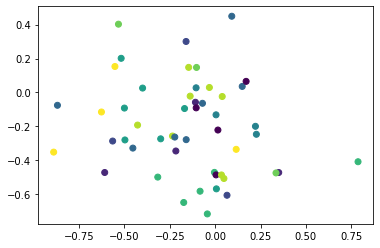

In [24]:
import matplotlib.pyplot as plt

plt.scatter(datapoints[:, 0], datapoints[:,1], c=y_test)
plt.show()


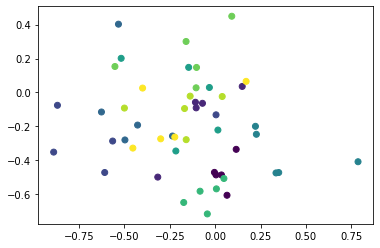

In [60]:
plt.scatter(datapoints[:, 0], datapoints[:,1], c=gt_labels)
plt.show()

In [49]:
y_test

array([6, 9, 0, 8, 2, 3, 6, 1, 3, 0, 1, 4, 9, 3, 2, 7, 5, 9, 8, 8, 6, 1,
       7, 4, 4, 8, 0, 8, 1, 5, 6, 8, 6, 5, 6, 7, 3, 2, 9, 4, 8, 5, 5, 8,
       3, 5, 5, 3, 0, 3])

In [62]:
for i in range(len(y_test)):
	if(y_test[i] == gt_labels[i]):
		print(f'Prediction: {y_test[i]}, Actual: {gt_labels[i]}')

Prediction: 0, Actual: 0
Prediction: 1, Actual: 1
Prediction: 2, Actual: 2
Prediction: 4, Actual: 4
Prediction: 4, Actual: 4
Prediction: 5, Actual: 5
Prediction: 6, Actual: 6
Prediction: 6, Actual: 6
Prediction: 6, Actual: 6
Prediction: 7, Actual: 7
Prediction: 8, Actual: 8
Prediction: 8, Actual: 8
